# A blueprint for conducting supervised learning problems

So far, we only talked about models for analyzing data. Obviously, data analysis consists of much more. This section is dedicated to provide a generalized structure how to conduct a full data analysis with the use of supervised learning. However, the procedure discussed should be regarded as a minimal standard which must be extended for more sophisticated and comprehensive analyses.

An analysis starts with data collection which strongly depends on the task and the environment you are working in. For instance, you may get instructions which data to collect for an analysis in the scope of your studies. Later, the data collection does strongly depend on the industry in which you are working. Of course, also the access you have or do not have strongly impacts the process of data collection. Once you get access to a data set, it is very unlikely that is is already in the shape which you need for the method of your choice. Thus, data preparation is needed which typically includes **encoding** and **scaling** of variables and the handling of missing values. Before the analysis starts, the data set is typically split into two or three data sets, i.e., **training**, **validation** and **test** data. Usually, the model is fitted with training data, hyperparameters are selected based on the validation sample and model performance is evaluated with test data. As stated earlier, it only makes sense to make inferences based on our model if it generalizes and works with new and unseen data. This is why we need data (test data) which was not used during model estimation for evaluation which is conducted on the basis of appropriate performance metrics.  

## One-Hot Encoding and Scaling

Categorical variables are often provided in non-numerical format ("bad", "good", "don't care") and therefore need to be converted to a numerical format. A convenient way to do so, is given by **one-hot encoding** which is conducted by generating of a feature vector with a dimension which equals the number of categories. All values in the feature vector are equal to zero except one value which is equal to one at a fixed position which represents a certain category, e.g.:

$$
\begin{align}
\text{bad} = [1, 0, 0]\\
\text{good} = [0, 1, 0]\\
\text{don't care} = [0, 0, 1]\\
\end{align}
$$

If variables are in quantitative format, we typically convert them to the same scale. This is mainly due to two reasons. (1) Comparability: Having all variables in the same range makes it easier to analyze the effect size of each variable on the target variable. (2) Computational stability: Estimation methods, or more concretely, computers can run into numerical problems if numerical values are very small or very big. 

**Normalization** and **standardization** can be used to bring variables to the same range. If we normalize a variable, we convert it from its original range to a fixed range $[a, b]$. This can be done by:

$$
x_{ij}^{*} = a + \frac{x_{ij} - x_{ij}^{\min}}{x_{ij}^{\max} - x_{ij}^{\min}} \cdot (b - a)
$$

with $x_{ij}$ as the realization of the random variable and $x_{ij}^{\min}, x_{ij}^{\max}$ as the smallest and highest observations in the data set. In comparison, standardization is done by:

$$
x_{ij}^{*} = \frac{x_{ij} - \hat{\mu}_{j}}{\hat{\sigma}_{j}}
$$

with $\hat{\mu}_{j}, \hat{\sigma}_{j}$ representing empirical estimates for the mean and standard deviation of feature variable $j$. After standardization, the feature variable has an expected value of zero and a standard deviation of one. There is no general rule if normalization or standardization should be preferred. If possible, you may want to try both.

Luckily, the Python scikit package offers a variety of data preprocessing methods. Let us take a look at some examples.

In [1]:
from sklearn.preprocessing import OneHotEncoder

#example data
X = [['bad'], ['good'], ['do not care']]

#define the encoder
encode = OneHotEncoder()

#fit the encoder, this means it learns how many different categories occur
encode.fit(X)

#transform from string to one-hot-vector
X_encoded = encode.transform(X).toarray()

print('-'*50)
print('One-hot encoding')
print('-'*50)
print('Original data:')
print(X)
print('')
print('Encoded data:')
print(X_encoded)
print('')
print('')

from sklearn.preprocessing import MinMaxScaler
import numpy as np

#example data
X = np.linspace(-5, 5, 10).reshape(-1, 1)

#define a normalizer, note: Normalization in the scikit package refers to scaling to unit-norm
#what we defined as normalization is called min-max-scaling in the scikit package
minmax = MinMaxScaler(feature_range = (-1, 1))

#fit the scaler to the data
minmax.fit(X)

#transform to the specified range
X_normalized = minmax.transform(X)

print('-'*50)
print('Normalization')
print('-'*50)
print('Original data:')
print(X)
print('')
print('Normalized data with a range [-1, 1]:')
print(X_normalized)


from sklearn.preprocessing import StandardScaler

#define a standard scaler
standard = StandardScaler()

#fit the scaler to the data
standard.fit(X)

#standardize
X_standard = standard.transform(X)

print('-'*50)
print('Standardization')
print('-'*50)
print('Original data:')
print(X)
print('')
print('Standardized data:')
print(X_standard)

--------------------------------------------------
One-hot encoding
--------------------------------------------------
Original data:
[['bad'], ['good'], ['do not care']]

Encoded data:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


--------------------------------------------------
Normalization
--------------------------------------------------
Original data:
[[-5.        ]
 [-3.88888889]
 [-2.77777778]
 [-1.66666667]
 [-0.55555556]
 [ 0.55555556]
 [ 1.66666667]
 [ 2.77777778]
 [ 3.88888889]
 [ 5.        ]]

Normalized data with a range [-1, 1]:
[[-1.        ]
 [-0.77777778]
 [-0.55555556]
 [-0.33333333]
 [-0.11111111]
 [ 0.11111111]
 [ 0.33333333]
 [ 0.55555556]
 [ 0.77777778]
 [ 1.        ]]
--------------------------------------------------
Standardization
--------------------------------------------------
Original data:
[[-5.        ]
 [-3.88888889]
 [-2.77777778]
 [-1.66666667]
 [-0.55555556]
 [ 0.55555556]
 [ 1.66666667]
 [ 2.77777778]
 [ 3.88888889]
 [ 5.        ]]

Standardized data:

Most of the time, data sets will contain categorical and quantitative variables. Encoding and scaling can be conducted at the same time by help of the *column transformer*.

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#create an artificial data set
x1 = np.random.choice(['good', 'bad', 'do not care'], size = 10)

#create quantiative variables
x2 = np.linspace(-5, 5, 10)
x3 = np.random.normal(loc = 2, scale = 2, size = 10)

#make a dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

print('This is our data set:')
print(df)
print('')

#with the colum transformer, we can define which variables are categorical and which
#are quantitative; together with the scaler, we can conduct encoding and scaling at once

#define categorical and quantitative variables by column name
categorical_variables = ['x1']
numerical_variables = ['x2', 'x3']

#define the transformer function we want to use
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

#define the preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('categorical', categorical_transformer, categorical_variables),
    ('numerical', numerical_transformer, numerical_variables)
])

#fit the preprocessor to data
preprocessor.fit(df)

#transform the data
print('This is the encoded and standardized data set:')
preprocessor.transform(df)

This is our data set:
            x1        x2        x3
0  do not care -5.000000 -2.211830
1  do not care -3.888889 -0.982169
2  do not care -2.777778 -0.444161
3         good -1.666667  0.921243
4          bad -0.555556  2.433861
5          bad  0.555556 -0.392734
6  do not care  1.666667  1.795180
7  do not care  2.777778  4.157417
8  do not care  3.888889  6.275879
9          bad  5.000000  0.236369

This is the encoded and standardized data set:


array([[ 0.        ,  1.        ,  0.        , -1.5666989 , -1.39556708],
       [ 0.        ,  1.        ,  0.        , -1.21854359, -0.88946004],
       [ 0.        ,  1.        ,  0.        , -0.87038828, -0.66802545],
       [ 0.        ,  0.        ,  1.        , -0.52223297, -0.10604924],
       [ 1.        ,  0.        ,  0.        , -0.17407766,  0.51651754],
       [ 1.        ,  0.        ,  0.        ,  0.17407766, -0.64685904],
       [ 0.        ,  1.        ,  0.        ,  0.52223297,  0.25364763],
       [ 0.        ,  1.        ,  0.        ,  0.87038828,  1.22590279],
       [ 0.        ,  1.        ,  0.        ,  1.21854359,  2.09782422],
       [ 1.        ,  0.        ,  0.        ,  1.5666989 , -0.38793134]])

## Missing Values

It often occurs that some values for certain variables are not available in a data set. These values are marked by blank spaces, "NA", "NaN" or other placeholders. By default, most of the models are not able to handle missing values by themselves which is why the user needs to decide what should be done. Again, there is no specific rule, what is best in this context. If only a very few observations are affected by missing values, it might be a good idea to remove the rows of these observations. Given this reduces the data set to a high extent, it should be considered to make use of data imputation techniques which means to replace missing values by certain numbers or categories. In general, one can distinguish between univariate and multivariate imputation techniques. The former replaces missing values by another value which is deduced from existing observations of the variable, only, while the latter deduces values with information of all the remaining variables. 

### Univariate imputation
If we use univariate imputation, we replace a missing value by another metric which is derived from the remaining observations of the variable. For instance missing values can be replaced by the average or the empirical median of the observations:

$$
x_{\cdot j}^{\text{new}} \leftarrow \frac{1}{\# \lbrace \boldsymbol{x}_{j}\rbrace} \sum_{i = 1...,l-1,l+1,...}^m x_{ij}
$$

$$
x_{\cdot j}^{\text{new}} \leftarrow \hat{F}_{0.50}^{-1} \left(x_{ij}^{\text{observed}} \right)
$$

where $\# \lbrace \boldsymbol{x}_{j}\rbrace$ stand for the number of observable values for feature $j$ and $\hat{F}$ for the empirical distribution function which is based on observable value for feature $j$. Another technique would be to interpolate missing values. If we want to impute missing values categorical variables, replacement by the most frequent category of observations may be chosen. 

### Multivariate imputation

If we use multivariate imputation, we treat the variable with missing values $\boldsymbol{x}_j$ as the target variable and use the remaining variables $\left(\boldsymbol{x}_1, ..., \boldsymbol{x}_{j - 1}, \boldsymbol{x}_{j + 1}, ..., \boldsymbol{x}_n \right)$ for predicting $\boldsymbol{\hat{x}}_j$. Those predictions can be used to replace missing values. Different model types which are suited for scale of $\boldsymbol{x}_j$ can be used for prediction. In practice, missing values can occur for different features. In this case prediction models are estimated for each feature (column) every time and replacements by predictions are used for the prediction model of the next column. To ensure stability of all estimated replacements, this process is iteratively repeated for a fixed number of rounds. 

As you can see in the code below, imputation of missing values can easily be implemented with the help of scikit impute methods. However, imputation should be treated with care. If it is not too computationally intensive, it is helpful to conduct the same analysis with different types of imputation and examine how sensitive results are with respect to varying methods.

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

#draw random observations
x = np.random.normal(loc = 2, scale = 2, size = 10).reshape(-1, 1)

#replace the second, fifth and seventh observation with a missing value
nan_index = [1, 4, 6]
for i in nan_index:
    x[i] = np.nan
    
#define the univariate imputer, strategy defines the metric which is used for replacement
#set strategy to most_frequent for categorical variables
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

#fit the imputer, this means: the empirical mean is calculated from observed data
imp.fit(x)

print('x before imputation')
print(x)
print('')

print('x after imputation')
print(imp.transform(x))
print('')

print('imputationn can also be applied to other arrays with missing values')
x_other = np.array([[np.nan], [1.2], [np.nan]])
print(x_other)
print('')

print('after imputation but replacement is based on data of the first array')
print(imp.transform(x_other))

x before imputation
[[3.6641071 ]
 [       nan]
 [1.80777985]
 [2.89207183]
 [       nan]
 [5.73870457]
 [       nan]
 [3.87124748]
 [2.62372877]
 [2.63291577]]

x after imputation
[[3.6641071 ]
 [3.31865077]
 [1.80777985]
 [2.89207183]
 [3.31865077]
 [5.73870457]
 [3.31865077]
 [3.87124748]
 [2.62372877]
 [2.63291577]]

imputationn can also be applied to other arrays with missing values
[[nan]
 [1.2]
 [nan]]

after imputation but replacement is based on data of the first array
[[3.31865077]
 [1.2       ]
 [3.31865077]]


In [4]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#create an artificial data set
x1 = np.linspace(-5, 5, 10)
x2 = np.random.normal(loc = 2, scale = 2, size = 10)

#make a dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2})

nan_index = [(2, 0), (4, 0), (1, 1), (7, 1)]

for ind in nan_index: 
    i, j = ind
    df.iloc[i, j] = np.nan

print('This is our data set from before but with missing values:')
print(df)
print('')

#define the multivariate imputer
imp = IterativeImputer(max_iter=10, random_state=0)

#fit to data
imp.fit(df)

print('This is our data set after multivariate imputation:')
print(imp.transform(df))
print('')
print('''Note: Multivariate imputation with categorical and quantitative variables 
is currently not implemented, but may be available in the future''')


This is our data set from before but with missing values:
         x1        x2
0 -5.000000  1.292234
1 -3.888889       NaN
2       NaN  2.334519
3 -1.666667 -1.631959
4       NaN -1.549038
5  0.555556  1.042069
6  1.666667  3.440995
7  2.777778       NaN
8  3.888889  1.929119
9  5.000000  2.604627



This is our data set after multivariate imputation:
[[-5.          1.29223436]
 [-3.88888889  0.09390732]
 [ 1.42750119  2.33451888]
 [-1.66666667 -1.63195868]
 [-2.43526535 -1.54903818]
 [ 0.55555556  1.04206888]
 [ 1.66666667  3.44099475]
 [ 2.77777778  1.77492326]
 [ 3.88888889  1.92911927]
 [ 5.          2.60462749]]

Note: Multivariate imputation with categorical and quantitative variables 
is currently not implemented, but may be available in the future


## Split Your Data

Before, we start to fit the model, data is divided into three subsets: **training data**, **validation data**, **test data**. Training data is used to estimate model parameters, validation data is used to compare different models or the same model with different hyperparameters, test data is used to derive the model performance with estimated parameters and fixed hyperparameters. Usually, a high proportion is used for training. Fractions in the range between 60%-80% are common. Remaining data is equally split for validation and testing. 

It is important that models work for new data. If this is the case it indicates a certain degree of generalization of our model which is our need when we want to make inferences about economic and financial regularities. To verify this, test data is used and it is important that test as well as validation data does not include data from the training set.

If you search for examples, you will often find that partitioning the subsets is done by drawing observations randomly from the overall data set. This comes along with the assumption that observations in the data set are independent from another. For most of the financial applications, this assumption is not true. For instance, take a look at the evolution of stock market prices or at economic cycle of the macro economy. You will see that to a certain degree patters repeat. Breaking data randomly may come along with biased inferences from the data. Given temporal dependence, randomly drawing of data subsets may lead to situations in which information from the future is used to learn about the past. Furthermore, if we randomly draw training data our predictions will be made as if independence over time is given. If this is not the case, predictions can be biased for non-randomized observations in the future. Or, assume your model works well for upswings but does not provide good predictions for periods of downturn and deterioration. Validation results of randomized subsets may average this performance, while in reality your model will totally fail during some periods. 

Accordingly, the best way to split data is by obtaining the natural temporal dependence structure in the subsets and by taking care that validation and testing data really does not include any information from test data, not even by indirect channels. For instance, assume today's stock market price is correlated with the stock market price five days ago. If we split data in between this five day period, information from the test data would be included in the validation data by this correlation over time. Overall, it can be very challenging to find appropriate ways for deriving appropriate time steps which are used for splitting the data in the presence of temporal dependence. For a start, we will split data without randomization and may discard some values at the end of the training and at the beginning of validation data. If we have reasonable assumptions regarding typical cyclical pattern length in the data, the split size should be a multiple of this length.

### Cross validation

Instead of simply splitting data once, it is in some way repeatedly done sometimes for mainly two reasons. First, to ensure that model estimation and validation results do not depend on a specific split of the data. Second, data sets can be small and splitting data is costly in a way that a certain fraction of the data is not used for learning and training. 

For independent data, cross validation is most often found in the form of $k$-fold cross validation. This means, the data set is folded into subsets of equal size. For $k$ times, the model is estimated by data of the $k-1$ subsets and evaluated on the remaining subset. Model performance is analyzed on the basis of average performance over $k$ performance results of this process. 

Again, this procedure is very tricky in the presence of temporal dependence. It might only work well in the same fashion, if we succeed in dividing the data into subsets with equal temporal structure, e.g., whole economic cycles. Another approach might lie in successively padding data over time. For instance, we start with a certain period $t = 1, ..., t^{*}$ to estimate the model and use the $t_k$ observations in the future for validation. For further test-validation splits we increase $t^{*}$ with a certain step size and again use $t_k$ future observations for validation. This procedure comes with some unpleasant statistical attributes, i.e., due to increasing test data sizes, performance metrics of validation sets are prone to varying levels of variance in prediction estimators. However, with this procedure we use the highest number of observations for training and retain the temporal structure. 

## Model Performance

So far, we only talked about how to prepare data and how to estimate the model. But how do we evaluate if the results we observe indicate good or poor model performance? 

At this point, it might help to look back at loss functions which were used to estimate the model. The smaller the value of the loss function, the better the model is adjusted to the training data. Accordingly, small values indicates resemblance between real life observations and predictions from the modeling world. However, as stated in the last subsection, this should true not only for the training, but also for validation and especially for test data. But, the metric itself, i.e., the way we calculate the loss can be used as a quantitative measure to compare different models and to analyze if performance of training and validation/test data is similar on a relative scale. 

In the center of model performance is always the target variable and depending on its nature (metric, categorical) an appropriate performance measure should be chosen. For metric target variables, the average squared deviation between target observations and predictions is the first possibility which can be used to measure performance of a model - this is the **mean squared error (MSE)**:

$$
MSE = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2
$$

While for estimation the squared deviation is preferable due to differentiability over the whole number range, the **mean absolute deviation (MAD)** can also be used to measure performance of metric predictions:

$$
MAD = \frac{1}{n} \sum_i |y_i - \hat{y}_i|
$$

In comparison, the MSE is more sensitive towards larger individual deviations. Depending on your preferences, this can be more or less important to you. 

When evaluating categorical variables, we could also use cross entropy functions for model evaluation. However, this only quantifies how good the probability estimates are. In practice, we are more interested in high quality category prediction and not in high quality probability estimates. This is why on a first level, we may use the **average accuracy (AA)** of predictions. So if we define a variable which is equal to one if the predicted category equals the observed one and zero otherwise:

$$
acc_i = 
\begin{cases}
1 & \text{if } y_i = \hat{y}_i  \\
0 & \text{else }
\end{cases}
$$

average accuracy is derived by:

$$
AA = \frac{1}{n} \sum_i acc_i
$$

AA serves as a broad indicator how well the classification performs. However, we may need a more detailed look at prediction errors, because we various error types can occur. At first, let us focus on the binary classification problem. A perfect model is able to predict an event if it occurs, $\hat{y}_i = 1= y_i$ which is called a **true positive (TP)**. Positive, because we predict the event will happen and true, because it actually happens. Furthermore, the perfect model predicts no event if it does not occur, $\hat{y}_i = 0 = y_i$ which is called **true negative (TN)**. Hopefully, you may guess that two things can go wrong. We can predict an event, but nothing happens, a **false positive (FP)** and we can predict no event, but it happens, a **false negative (FN)**. Depending on the problem, the occurrence of FPs and FNs may be of different importance. Thus, a more detailed overview of model performance is illustrated in the confusion matrix:

<br>
<table>
    <tr>
        <td>   </td>
        <td> prediction event    </td>
        <td> prediction no event </td>
    </tr>
    <tr>
        <td> actual event </td>
        <td> TP </td>
        <td> FN </td>
    </tr>
    <tr>
        <td> actual no event </td>
        <td> FP </td>
        <td> TN </td>
    </tr>    
</table>

To examine the quality of event predictions, we may consider the **true positive rate (TRP)** also called **recall** or **sensitivity** and the **true negative rate (TRN)** also called **selectivity** or **specificity**. The TPR is the ratio of TPs in relation to the number of occurrences, so TPs and FNs:

$$
TPR = \frac{TP}{TP + FN}
$$

The TNR is the ratio of TNs in relation to the number of no occurrences, so TNs and FPs:

$$
TNR = \frac{TN}{TN + FP}
$$

The counterpart to the TPR is the **false positive rate (FPR)** which is 1 - TNR, while the counterpart of the TNR is the **false negative rate (FPR)** which is 1 - TPR. Further which focus on the quality of positive and negative predictions, respectively, are the **positive predicted value (PPV)** also called **precision** and the **negative predicted value (NPV)**. The PPV is the ratio of TPs and the overall number of positive predictions:

$$
PPV = \frac{TP}{TP + FP}
$$

Analogously, the NPV is the ratio of TN in relation to the overall number of negative predictions:

$$
NPV = \frac{TN}{TN + FN}
$$


While one needs to get used to the variety of definitions, a first look at the confusion matrix can be very informative. The higher the numbers on the diagonal, the better. Furthermore, if one number of the off-diagonal elements is significantly higher, you may face a high degree of imbalance in the prediction errors of your model. In these cases, it should be evaluated if this is critical for the task. For instance, in medicine, it is usually worse not to detect a disease if a person is sick (FN) instead of suspecting a disease which in the end can not be confirmed (FP). Accordingly, we would be prefer tests with a low number of FNs, even though higher values of FPs are detected. 

However, if the imbalance of FNs and FPs is not acceptable, one way to deal with it may be given by adjusting the probability threshold $c$ which divides the two categories. Remember that many classification models to not predict the category, but return a probability $\pi_i = P(Y_i = 1 | \boldsymbol{X}_i)$. In general, we would expect a certain behavior of good classification models for decreasing values of $c$. Assume we choose a rather high value, e.g., $c = 0.95$. As a result we rarely make predictions $\hat{y}_i = 1$ which decreases the FPR, but at the same time also the TPR. This changes for low values of $c$ leading to high FPRs and high TPR. The better the model the stronger is this relationship. To examine this behavior visually, the ROC curve is used. It plots displays the FPR against the TPR for decreasing values of $c$.

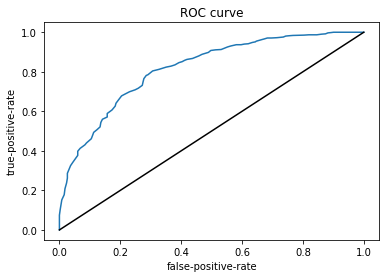

In [5]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#sample size of 1,000 data points
m = 1000

#parameter values
w = np.array([1.2, -0.7, 0.2])
b = 0.5

#randomly generate feature values for three feature variables 
np.random.seed(42)
X = np.random.normal(size = 3 * m).reshape(m, 3)

#now we generate values for the probabilities of P(Y_i = 1) 
z = X.dot(w) + b 
pi = 1 / (1 + np.exp(-z))

#draw random Bernoulli numbers according to these probabilities
y = np.random.binomial(n = 1, p = pi)

#fit the model
log_reg = LogisticRegression().fit(X, y)


#define varying threshold levels
thresholds = np.linspace(1, 0, 100)

#placeholders for false-positive-rates and true-positive-rates
fprs = []
tprs = []

#in a loop determine cateogrical predictions given a threshold
#and derive fpr and tpr
for threshold in thresholds:
    
    y_pred = (log_reg.predict_proba(X)[:, 1] > threshold) * 1
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    
    fprs.append(fpr)
    tprs.append(tpr)
    
plt.plot(fprs, tprs)
plt.plot([0, 1], [0, 1], color = 'black')
plt.xlabel('false-positive-rate')
plt.ylabel('true-positive-rate')
plt.title('ROC curve')
plt.show()

To quantify what we see in the ROC curve with one value, the Area under the ROC curve (AUROC) can be determined. If this value is higher than $0.50$ our model is better than random classification. The higher the value the better the model. If we estimated a model which returns predicted probabilities, the AUROC can be derived using the corresponding function from scikit metrics.

In [6]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y, log_reg.predict_proba(X)[:, 1])
print(f'The AUROC for the model displayed above equals: {auroc:.4f}')

The AUROC for the model displayed above equals: 0.8164


Analogously, presented metrics and principles of the binary case can be applied to the multi-classification scenario.

## Identification and Handling of Under- and Overfitting

One of the most important tasks when evaluating the model is to identify **under- and overfitting** because this is necessary to evaluate generalization of a model. Underfitting refers to the phenomena of using models which are not complex enough to capture relationships as they exists in reality. Model which underfit are said to have high bias. This means estimates systematically deviate from targets. Easily speaking underfit can be identified by bad model performance of the training data. The origin of underfit can lie in incapability of the model to mimic realistic behavior or in usage of features which are not appropriate to estimate the target variable. 

While nowadays, the former is usually not of a concern, especially in finance, the latter is of high relevance for predicting future market movements. Efficient markets quickly process present information which is almost synchronously transferred to price movements. Accordingly, todays information will not provide any guidance for movements in the future. This makes features which are based on current information rather useless for future predictions. Accordingly, one of the major tasks for professional investors is to find inefficiencies and ways to engineer features from today's information which, at least to a certain degree, exhibit dependence to future movements. Because in general, if features are independent to the target variable, the fanciest model will fail to generate reliable predictions for the target. 

Overfitting is a phenomenon that  relates to striking model performance for training data and poor performance for validation and test data. The reason for overfitting typically lies in the use of very flexible models which are fitted precisely to the training data, and hereby, loose generality. Especially in finance and economics, real-life observations are often affected by randomness. Imagine economic development is partly driven by deterministic relationships, like more income, more consumption, higher gross domestic product and partly by random events like individual consumption behavior, time of consumption, etc. An overfitting model would not only capture the deterministic part, but also the random part in the data. If new data arrives, the random part will differ which leads to poor predictive performance because the model will make predictions by making use of randomness in the past which by definition will be different to todays randomness. Thus, models that overfit are said to have high variance, which means that predictions will strongly deviate on specific (random) data samples and vary to a high degree for different data samples.

In the example below you can see three plots. The original model which is illustrated in the middle is a regression model with a second degree polynomial:

$$
Y_i = w_1 X_{i} + w_2 X_{i}^2 + \epsilon_i
$$

In the left you can observe that a linear regression model is not able to capture the non-linear dynamics, thus, it underfits. In the right, you can observe the fitted model of a polynomial regression model with eight degrees. As you can see, the estimated values for the target variable are less stable and try to capture rather specific values. This is typical for overfitting models.

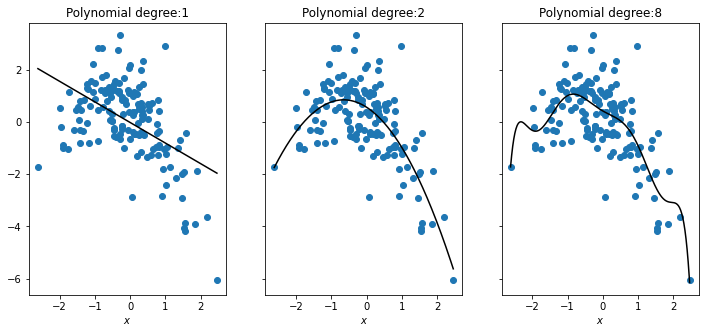

In [7]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

def fit_polynomial(position, k = 1):

    lin_mod = LinearRegression()
    X_data = np.hstack([x**(i+1) for i in range(k)])

    lin_mod.fit(X_data, y)

    x_values = np.linspace(np.min(x), np.max(x), 500).reshape(-1, 1)
    X_values = np.hstack([x_values**(i+1) for i in range(k)])
    
    axs[position].plot(x_values, lin_mod.predict(X_values), color = 'black')
    axs[position].scatter(x, y)
    axs[position].set_xlabel(r'$x$')
    axs[position].set_title('Polynomial degree:' + str(k))
    

m = 150
n = 2

np.random.seed(42)
x = np.random.normal(size = m).reshape(-1, 1)
eps = np.random.normal(size = m, scale = 1)

beta = np.random.normal(size = n)
beta_0 = 0.4


X = np.hstack([x**(i + 1) for i in range(n)])
y = beta_0 + X.dot(beta) + eps

fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(12)
fit_polynomial(0, 1)
fit_polynomial(1, 2)
fit_polynomial(2, 8)

How can we handle under- and overfitting? Regarding underfitting it gets easy. Use a more complex model and use better features. However, the latter is nothing we can pick arbitrarily, because in some cases such features may not exist or can not be generated. Regarding overfitting, a list of different methods exists. What they have in common is, that model selection or estimation is somehow sabotaged. For instance:

* Early stopping during estimation
* Use a less flexible model
* Use less features or reduce feature dimensionality, respectively
* Regularization

**Regularization** is one of the most common techniques which is why we take a closer look at it. The idea of regularization is to add a term to the estimation loss function which penalized the use of features. As a result, regularized models are more parsimonious, typically with an increase in bias but a decrease in variance of predictions. Two different forms of regularization are common, i.e., L1 and L2, also known as **Lasso** and **Ridge**. Using regularization in combination with a linear regression model:

$$
Y_i = \boldsymbol{w}^T \boldsymbol{X}_i + b + \epsilon_i
$$

the loss function:

$$
L(\boldsymbol{w}^T, b) = \sum_{i = 1}^m \left( Y_i - \boldsymbol{w}^T \boldsymbol{X}_i - b \right)^2
$$

under L1-regularization evolves to:

$$
L(\boldsymbol{w}^T, b) = \sum_{i = 1}^m \left( Y_i - \boldsymbol{w}^T \boldsymbol{X}_i - b \right)^2 + \alpha || \boldsymbol{w} ||
$$

with $|| \boldsymbol{w} || = \sum_j |w_j|$

and under L2-regularization to:

$$
L(\boldsymbol{w}^T, b) = \sum_{i = 1}^m \left( Y_i - \boldsymbol{w}^T \boldsymbol{X}_i - b \right)^2 + \alpha || \boldsymbol{w} ||_2^2
$$

with $|| \boldsymbol{w} ||_2^2 = \sum_j w_j^2$, $\alpha$ is a hyperparameter which controls the degree of penalization. 

In comparison to the original linear regression model nothing changes, except that we add either the sum of absolute weights or the sum of squared weights to the loss function when estimating the model. 

Nevertheless, the effect of both techniques with respect to the weights differs. Lasso regularization tends to exclude certain variables completely, while Ridge regression decreases all weights in a comparable manner. This makes Lasso regularization more valuable for the identification of important features, however, performance is usually better with Ridge regression. 

As an example, we generate a data set with ten feature which are more or less the same (except for a little randomness) and generate target observations if the true model is given by a linear regression model which uses all features. In the correlation matrix below, we visualize the correlation among features. The phenomenon of highly correlated variables is also known as **multicollinearity**. Intuitively, it should make sense that we may not all variables for prediction, if the information in each variable is more or less identical. 

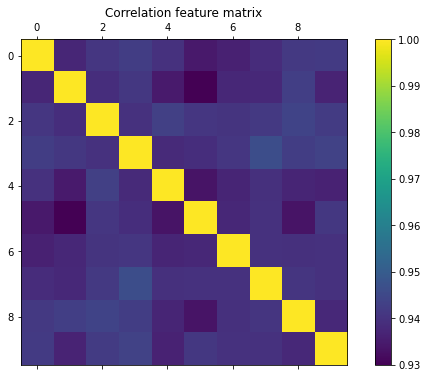

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

m = 500
n = 10

weights = np.random.normal(size = n)

x = np.random.normal(size = 500).reshape(-1, 1)
X = np.hstack([x * 0.8 + np.random.normal(size = m, scale = 0.2).reshape(-1, 1) for i in range(n)])
y = X.dot(weights) + np.random.normal(size = m, scale = 0.5)

df = pd.DataFrame(X)

fig, ax = plt.subplots()

im = ax.matshow(df.corr())
fig.colorbar(im)
ax.set_title('Correlation feature matrix')
fig.set_figheight(6)
fig.set_figwidth(10)
plt.show()

Now, we fit the linear regression model with Lasso and Ridge regularization and examine the impact of increasing penalization which is controlled by $\alpha$. The difference between both techniques are quite obvious. In case of Lasso regularization, weights of individual features diminish towards zero, but this happens feature after feature. In case of Ridge regularization, more or less all weights decrease simultaneously with increasing penalization. Please note that regularization is a general technique which can be applied to different models in an analogous manner.

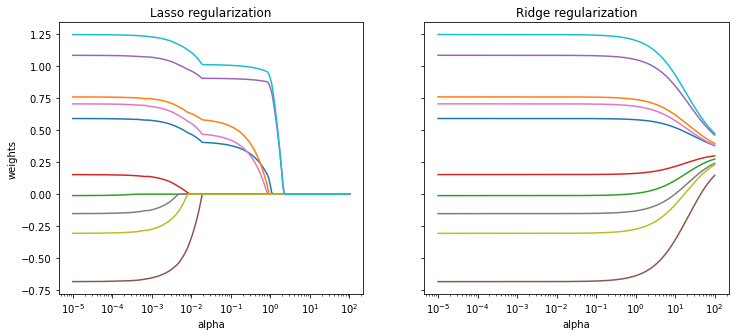

In [9]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-5, 2, n_alphas)
lasso_coefs = []
ridge_coefs = []

for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

    ridge = Ridge(alpha = a)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    
fig, axs = plt.subplots(1, 2, sharex = True, sharey = True)

axs[0].plot(alphas, lasso_coefs)
axs[0].set_xscale('log')
#axs[0].set_xlim(ax.get_xlim()[::-1])  # reverse axis
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('weights')
axs[0].set_title('Lasso regularization')

axs[1].plot(alphas, ridge_coefs)
axs[1].set_xscale('log')
#axs[1].set_xlim(ax.get_xlim()[::-1])  # reverse axis
axs[1].set_xlabel('alpha')
axs[1].set_title('Ridge regularization')

fig.set_figheight(5)
fig.set_figwidth(12)

plt.axis('tight')
plt.show()